In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
datasets = {1: 'data/IT2/RegressionContrastive', 
            2: 'data/IT2/Contrastive', 
            #3: 'data/IT2/ContinuedContrastive', 
            4: 'data/IT2/OnlyPositiveContrastive',
            5: 'data/IT2/RegContrastiveContinued',
            6: 'data/IT2/CDFTobit/epoch_180',
            7: 'data/IT3/LogTobitAndCDF',
            8: 'data/IT3/LogTobitAndCDF1',
            9: 'data/IT3/RegressionNegNum1',
            10: 'data/IT2/ContrastiveVariantMSE',
            12: 'data/IT4/MSEAndContrastive/Train',
            13: 'data/IT4/Contrastive/Train',
            14: 'data/IT4/MSEContrativeCombined/Test',
            15: 'data/IT4/MSEOnlyPosZurich/Train',
            16: 'data/IT5/MSEAndContrastive400/Test',
            18: 'data/IT5/MSEAndContrastive20Meter400/Test',
            19: 'data/IT5/FullDatasetContrastive25Meter/Train',
            20: 'data/IT5/FullDatasetMSEAndContrastive25Meter/Train',
            21: 'data/IT5/FullDatasetMSEAndContrastive/Train',
            22: 'data/IT5/MSEAndContrastiveSmoothed/Test',
            27: 'data/IT6/GeneralizedContrastive/Train'}

no = 2
gps = np.genfromtxt(f'{datasets[no]}/gps.csv', delimiter=',')
emb = np.genfromtxt(f'{datasets[no]}/embedding.csv', delimiter=',')
emb = 1-emb

# filter away negatives
for i in range(len(gps)):
    gps[i][gps[i] > 25] = 0
    emb[i][gps[i] > 25] = 1

# Correlation

MSE: 0.0014311220465396673
Gradient: [0.00133562]


(0.0, 1.0)

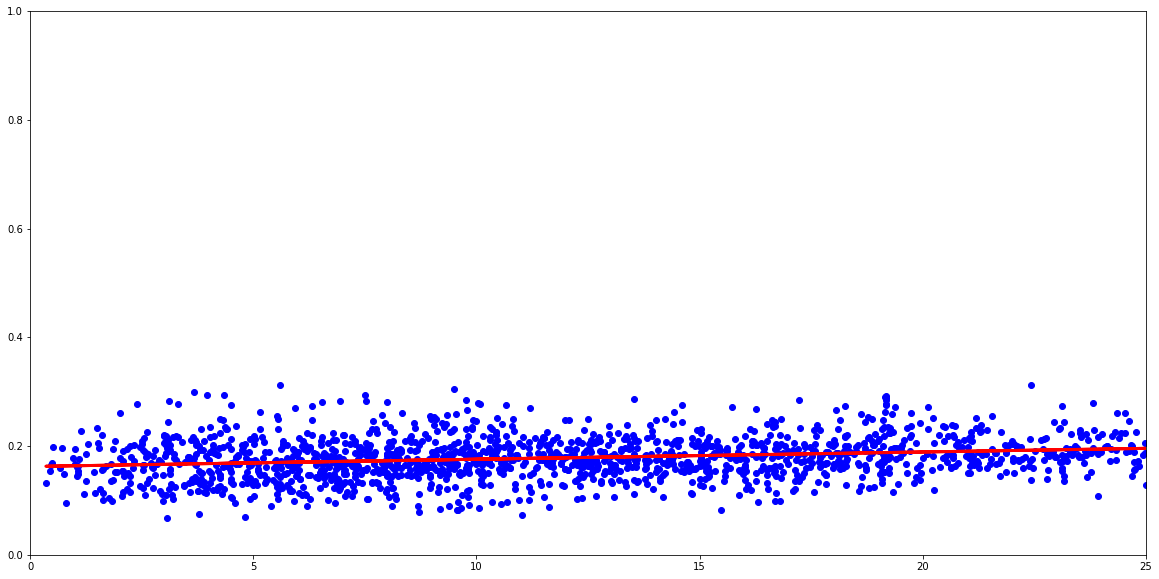

In [10]:
positive_emb = emb[gps != 0].reshape(-1, 1)
positive_gps = gps[gps != 0].reshape(-1, 1)

reg = LinearRegression().fit(positive_gps, positive_emb)
mse = mean_squared_error(positive_emb, reg.predict(positive_gps))
print(f'MSE: {mse}')
print(f'Gradient: {reg.coef_[0]}')

predicted = reg.predict(positive_gps)


#Plot
fig, axs = plt.subplots(1, 1, figsize=(20,10))
axs.scatter(positive_gps, positive_emb, color='b')
axs.plot(positive_gps, predicted, color='red', linewidth=3)
axs.set_xlim([0, 25])
axs.set_ylim([0.0, 1.0])

# Kendall's Tau

In [11]:
def kendalltau(ranking_a, ranking_b):
    return stats.kendalltau(np.argsort(ranking_a), np.argsort(ranking_b))

def linear_regression_predict(gps, emb):
    reshaped_gps = gps.reshape(-1, 1)
    reshaped_emb = emb.reshape(-1, 1)
    reg = LinearRegression().fit(reshaped_gps, reshaped_emb)
    return reg, reg.predict(reshaped_gps)

In [12]:
def kt_scores():
    N = len(gps)
    scores = np.zeros(N)
    for i in range(N):
        c, p = kendalltau(gps[i], emb[i])
        scores[i] = c
    print(np.mean(scores), np.max(scores))
    return scores

def MSE_scores():
    scores = []
    for i in range(len(gps)):
        emb_i = emb[i][gps[i] != 0]
        gps_i = gps[i][gps[i] != 0]
        if len(gps_i) > 2:
            y = (gps_i)**2 / 35**2
            scores.append(mean_squared_error(y, emb_i))
    print(np.mean(scores), np.max(scores))
    return scores

def correlation_scores():
    scores = []
    for i in range(len(gps)):
        emb_i = emb[i][gps[i] != 0]
        gps_i = gps[i][gps[i] != 0]
        if len(gps_i) >= 3:
            reg, _ = linear_regression_predict(gps_i, emb_i)
            scores.append(reg.coef_[0][0])
    print(np.mean(scores), np.max(scores))
    return scores

In [13]:
contrastive = correlation_scores()
#mse25 = correlation_scores()
#mse = correlation_scores()
#mse_smoothed = correlation_scores()

0.0025339014080938095 0.31371393835323785


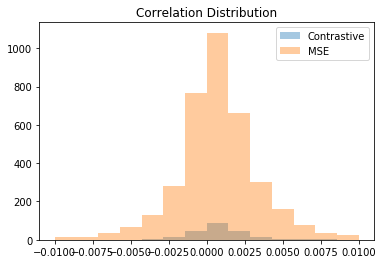

In [14]:
bins_list = np.linspace(-0.01, 0.01, num=15)
plt.hist(contrastive, alpha=0.4, label='Contrastive', bins=bins_list)
#plt.hist(mse, alpha=0.4, label='MSE (Only Positive)', bins=bins_list)
plt.hist(mse25, alpha=0.4, label='MSE', bins=bins_list)
#plt.hist(mse_smoothed, alpha=0.4, label='MSE Smoothed', bins=bins_list)
plt.title("Correlation Distribution")
plt.legend()
plt.show()

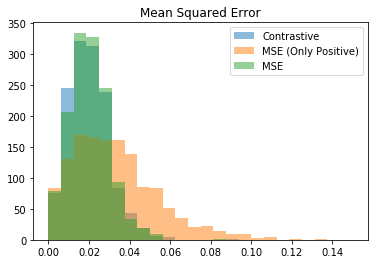

In [120]:
bins_list = np.linspace(0, 0.15, num=25)
plt.hist(contrastive, alpha=0.5, label='Contrastive', bins=bins_list)
plt.hist(mse_only, alpha=0.5, label='MSE (Only Positive)', bins=bins_list)
plt.hist(mse, alpha=0.5, label='MSE', bins=bins_list)
plt.title('Mean Squared Error')
plt.legend()

In [140]:
#contrastive = correlation_scores()
#mse = correlation_scores()
mse_only = correlation_scores()

0.0005234067093635632 0.4474070181584631


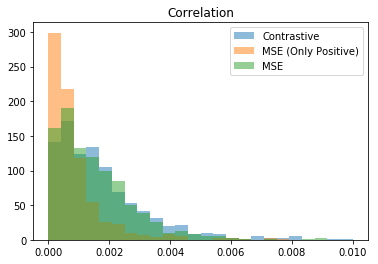

In [142]:
bins_list = np.linspace(0, 0.01, num=25)
plt.hist(contrastive, alpha=0.5, label='Contrastive', bins=bins_list)
plt.hist(mse_only, alpha=0.5, label='MSE (Only Positive)', bins=bins_list)
plt.hist(mse, alpha=0.5, label='MSE', bins=bins_list)
plt.title('Correlation')
plt.legend()